In [11]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVR
# Setting random seed to get reproducible runs
RSEED = 100

# Part 1: Data Processing

In [12]:
data = pd.read_csv("factorsCancerPerCounty.csv")

In [13]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
data.columns

Index(['locale', 'fips', 'incidence rate_per_100000', 'annual_count_avg',
       'areatype', 'cancer', 'stateFIPS', 'state', 'cancer_description',
       'ACID', 'ENRG', 'ETOX', 'EUTR', 'FOOD', 'GCC', 'HAPS', 'HAZW', 'HC',
       'HNC', 'HRSP', 'HTOX', 'JOBS', 'LAND', 'METL', 'MINE', 'MSW', 'NREN',
       'OZON', 'PEST', 'REN', 'SMOG', 'VADD', 'WATR'],
      dtype='object')

In [15]:
factors=np.array(['ACID', 'ENRG', 'ETOX', 'EUTR', 'FOOD',
       'GCC', 'HAPS', 'HAZW', 'HC', 'HNC', 'HRSP', 'HTOX', 'JOBS', 'LAND',
       'METL', 'MINE', 'MSW', 'NREN', 'OZON', 'PEST', 'REN', 'SMOG', 'VADD',
       'WATR'])

In [16]:
data

,locale,fips,incidence rate_per_100000,annual_count_avg,areatype,cancer,stateFIPS,state,cancer_description,ACID,...,METL,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR
0,"Autauga County(6,10)",1001,495.6,304,county,1,1,alabama,All Cancer Sites,299.152569,...,0.050200,0.000000,2149.369209,435169.166702,0.002923,0.034974,293475.377416,2949.632736,79914.159702,7851.498268
1,"Autauga County(6,10)",1001,13.5,8,county,3,1,alabama,Oral Cavity & Pharynx,299.152569,...,0.050200,0.000000,2149.369209,435169.166702,0.002923,0.034974,293475.377416,2949.632736,79914.159702,7851.498268
2,"Autauga County(6,10)",1001,0.0,3,county,17,1,alabama,Esophagus,299.152569,...,0.050200,0.000000,2149.369209,435169.166702,0.002923,0.034974,293475.377416,2949.632736,79914.159702,7851.498268
3,"Autauga County(6,10)",1001,9.1,6,county,18,1,alabama,Stomach,299.152569,...,0.050200,0.000000,2149.369209,435169.166702,0.002923,0.034974,293475.377416,2949.632736,79914.159702,7851.498268
4,"Autauga County(6,10)",1001,52.2,32,county,20,1,alabama,Colon & Rectum,299.152569,...,0.050200,0.000000,2149.369209,435169.166702,0.002923,0.034974,293475.377416,2949.632736,79914.159702,7851.498268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72054,"Weston County(6,10)",56045,0.0,3,county,86,56,wyoming,Non-Hodgkin Lymphoma,34.618906,...,0.000817,17113.628433,348.003649,428660.792817,0.000395,0.000943,77.061234,1321.995548,12995.136488,47.904143
72055,"Weston County(6,10)",56045,0.0,3,county,90,56,wyoming,Leukemia,34.618906,...,0.000817,17113.628433,348.003649,428660.792817,0.000395,0.000943,77.061234,1321.995548,12995.136488,47.904143
72056,"Weston County(6,10)",56045,0.0,3,county,400,56,wyoming,Breast (in situ) (Female),34.618906,...,0.000817,17113.628433,348.003649,428660.792817,0.000395,0.000943,77.061234,1321.995548,12995.136488,47.904143
72057,"Weston County(6,10)",56045,0.0,3,county,515,56,wyoming,"Childhood (Ages <20, All Sites)",34.618906,...,0.000817,17113.628433,348.003649,428660.792817,0.000395,0.000943,77.061234,1321.995548,12995.136488,47.904143


In [18]:
#print(data.dtypes)
#data['annual_count_avg'].replace({r'[^\x00-\x7F]+':'0'}, regex=True, inplace=True)
#data['annual_count_avg'] = data['annual_count_avg'].astype("float64")

In [19]:
cancerVals=data["cancer"].unique()
cancerVals

array([  1,   3,  17,  18,  20,  35,  40,  47,  53,  55,  57,  58,  61,
        66,  71,  72,  76,  80,  86,  90, 400, 515, 516], dtype=int64)

In [20]:
cancerDescr=data["cancer_description"].unique()
cancerDescr

array(['All Cancer Sites', 'Oral Cavity & Pharynx', 'Esophagus',
       'Stomach', 'Colon & Rectum', 'Liver & Bile Duct', 'Pancreas',
       'Lung & Bronchus', 'Melanoma of the Skin', 'Breast (Female)',
       'Cervix (Female)', 'Uterus (Corpus & Uterus, NOS) (Female)',
       'Ovary (Female)', 'Prostate (Male)', 'Bladder',
       'Kidney & Renal Pelvis', 'Brain & ONS', 'Thyroid',
       'Non-Hodgkin Lymphoma', 'Leukemia', 'Breast (in situ) (Female)',
       'Childhood (Ages <20, All Sites)',
       'Childhood (Ages <15, All Sites)'], dtype=object)

In [21]:
cancerDescription=data[["cancer","cancer_description"]]
cancerTypes=cancerDescription.groupby(["cancer","cancer_description"]).sum().reset_index()
print(cancerTypes)
cancer=cancerTypes["cancer"]==3
print("example:")
print(cancerTypes[cancer]["cancer_description"].to_string())

    cancer                      cancer_description
0        1                        All Cancer Sites
1        3                   Oral Cavity & Pharynx
2       17                               Esophagus
3       18                                 Stomach
4       20                          Colon & Rectum
5       35                       Liver & Bile Duct
6       40                                Pancreas
7       47                         Lung & Bronchus
8       53                    Melanoma of the Skin
9       55                         Breast (Female)
10      57                         Cervix (Female)
11      58  Uterus (Corpus & Uterus, NOS) (Female)
12      61                          Ovary (Female)
13      66                         Prostate (Male)
14      71                                 Bladder
15      72                   Kidney & Renal Pelvis
16      76                             Brain & ONS
17      80                                 Thyroid
18      86                    N

# Part 2: Random Forest Regressor

## Hypertuning

In [24]:
cancerData=data["cancer"]==1
newData=data[cancerData]    

#splitting to test and train
x1=newData.loc[:, 'ACID':'WATR']
y = newData['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)
scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)

XTrain (2193, 24)
XTest (940, 24)


In [192]:
# Create the model with 10 trees
#regressor = RandomForestRegressor(n_estimators = 100,
                                 # random_state = RSEED)

# Fit on training data
#regressor.fit(X_train, y_train)

parameters={'n_estimators':[4, 16,32,50,64,100,128, 256],'max_depth': [2, 8, 16,32,50,64]}
rf = RandomForestRegressor(random_state = RSEED)
clf = GridSearchCV(rf, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=100,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_

In [193]:
print(clf.best_params_)

{'max_depth': 8, 'n_estimators': 100}


## Random Forest Loop

cancer type: 1
0    All Cancer Sites
Creating RandomForest Model and Fitting the Data
score 0.8852407861819583
Feature Importance
indecis: [ 4 16 14 12 18  3 22 10  6  5  7 19  2  0  9  8 11 21  1 17 13 15 20 23]
importances: [0.49268192 0.12579432 0.07567727 0.05688776 0.04149034 0.02959606
 0.02280888 0.02127417 0.02013722 0.01699096 0.01452833 0.01234892
 0.01170191 0.01157722 0.01117984 0.00854697 0.00459369 0.00424026
 0.00399506 0.00363218 0.00308794 0.0028779  0.00219499 0.00215589]
features: ['FOOD' 'MSW' 'METL' 'JOBS' 'OZON' 'EUTR' 'VADD' 'HRSP' 'HAPS' 'GCC'
 'HAZW' 'PEST' 'ETOX' 'ACID' 'HNC' 'HC' 'HTOX' 'SMOG' 'ENRG' 'NREN' 'LAND'
 'MINE' 'REN' 'WATR']


cancer type: 3
1    Oral Cavity & Pharynx
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8912823129262131
Feature Importance
indecis: [ 4 16 14 18  6 12 10  3 22  7  2  0 19  8 11  9  5 15  1 21 17 13 20 23]
importances: [0.5477527  0.12695945 0.0518122  0.04423135 0.03681129 0.03081746
 0.02293407 0.0227872  0.01746641 0.01303041 0.01220525 0.01083486
 0.01070295 0.00994424 0.00769991 0.00521176 0.00482829 0.0047111
 0.00462975 0.00328971 0.00323408 0.00298026 0.00273162 0.00239372]
features: ['FOOD' 'MSW' 'METL' 'OZON' 'HAPS' 'JOBS' 'HRSP' 'EUTR' 'VADD' 'HAZW'
 'ETOX' 'ACID' 'PEST' 'HC' 'HTOX' 'HNC' 'GCC' 'MINE' 'ENRG' 'SMOG' 'NREN'
 'LAND' 'REN' 'WATR']


cancer type: 17
2    Esophagus
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8147285115763045
Feature Importance
indecis: [ 4 16 14 12  3  6 22  9 10 18 11  0 19  8  5  2 15 21  7 17 13 20  1 23]
importances: [0.52822139 0.11779892 0.06302532 0.03714294 0.03103647 0.02510674
 0.02236052 0.0202514  0.01863412 0.0173182  0.01587547 0.01581091
 0.01335691 0.01327824 0.01162932 0.01090929 0.00692088 0.00686067
 0.00685365 0.00491723 0.00428296 0.00352738 0.00273142 0.00214966]
features: ['FOOD' 'MSW' 'METL' 'JOBS' 'EUTR' 'HAPS' 'VADD' 'HNC' 'HRSP' 'OZON'
 'HTOX' 'ACID' 'PEST' 'HC' 'GCC' 'ETOX' 'MINE' 'SMOG' 'HAZW' 'NREN' 'LAND'
 'REN' 'ENRG' 'WATR']


cancer type: 18
3    Stomach
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8506912725026379
Feature Importance
indecis: [ 4 12 14 16  3 22 18  5 10  6  8  7 19 21  0 11  9 23 15 20  1  2 17 13]
importances: [0.24067044 0.16633722 0.11864369 0.10198101 0.05997125 0.05477799
 0.05054731 0.04384246 0.03206688 0.02280872 0.0157404  0.01494672
 0.00957518 0.00938331 0.00761809 0.00751688 0.00720453 0.00628966
 0.00627715 0.00619381 0.00613021 0.00492523 0.00472972 0.00182214]
features: ['FOOD' 'JOBS' 'METL' 'MSW' 'EUTR' 'VADD' 'OZON' 'GCC' 'HRSP' 'HAPS' 'HC'
 'HAZW' 'PEST' 'SMOG' 'ACID' 'HTOX' 'HNC' 'WATR' 'MINE' 'REN' 'ENRG'
 'ETOX' 'NREN' 'LAND']


cancer type: 20
4    Colon & Rectum
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8498637009893605
Feature Importance
indecis: [ 4 16 14 12 18 10 22  3  6  5  8 19  7 11  0  9  2 13 21 17  1 20 15 23]
importances: [0.39879631 0.11286664 0.10059166 0.06950069 0.0438727  0.0406677
 0.03113411 0.03112462 0.02786254 0.02375907 0.01704526 0.01691604
 0.01669079 0.01499256 0.01023048 0.00962566 0.00918123 0.00565248
 0.00444212 0.00341442 0.00340087 0.00317169 0.00308215 0.00197821]
features: ['FOOD' 'MSW' 'METL' 'JOBS' 'OZON' 'HRSP' 'VADD' 'EUTR' 'HAPS' 'GCC' 'HC'
 'PEST' 'HAZW' 'HTOX' 'ACID' 'HNC' 'ETOX' 'LAND' 'SMOG' 'NREN' 'ENRG'
 'REN' 'MINE' 'WATR']


cancer type: 35
5    Liver & Bile Duct
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8442765993098549
Feature Importance
indecis: [ 4 14 12 16 18  6  3  5 10 22  0 11 19  8  9  2 17 23 20  1  7 15 21 13]
importances: [0.36606347 0.14054152 0.11281052 0.05226175 0.05159953 0.05045629
 0.02844971 0.02791108 0.02306719 0.01936385 0.01850295 0.01761284
 0.01720665 0.01551091 0.01082096 0.00984669 0.00708267 0.0057869
 0.0050973  0.00499926 0.00488526 0.003577   0.00335456 0.00319114]
features: ['FOOD' 'METL' 'JOBS' 'MSW' 'OZON' 'HAPS' 'EUTR' 'GCC' 'HRSP' 'VADD'
 'ACID' 'HTOX' 'PEST' 'HC' 'HNC' 'ETOX' 'NREN' 'WATR' 'REN' 'ENRG' 'HAZW'
 'MINE' 'SMOG' 'LAND']


cancer type: 40
6    Pancreas
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8576572930029167
Feature Importance
indecis: [ 4 16 12 14 18  3 10  6 22  5  2  9 11 19  0  7  8 21 17 20 13 15 23  1]
importances: [0.44629605 0.10219802 0.0937944  0.08850614 0.04172812 0.03004026
 0.0264428  0.02518926 0.0251182  0.01859682 0.0167338  0.01591569
 0.01203094 0.01162257 0.00937964 0.00758455 0.00741348 0.0048431
 0.00330064 0.00312552 0.00287827 0.00287217 0.00248366 0.00190589]
features: ['FOOD' 'MSW' 'JOBS' 'METL' 'OZON' 'EUTR' 'HRSP' 'HAPS' 'VADD' 'GCC'
 'ETOX' 'HNC' 'HTOX' 'PEST' 'ACID' 'HAZW' 'HC' 'SMOG' 'NREN' 'REN' 'LAND'
 'MINE' 'WATR' 'ENRG']


cancer type: 47
7    Lung & Bronchus
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8243010676486408
Feature Importance
indecis: [ 4 16 12 14  8  3 22  6 10 18 11 19  5  2  9 17  1 15  7  0 20 13 23 21]
importances: [0.45575133 0.1918567  0.05581671 0.04154461 0.0331364  0.03159982
 0.02562481 0.02288691 0.02045719 0.02021858 0.01808373 0.01482849
 0.01136594 0.00838209 0.00781174 0.0060922  0.00562766 0.00557724
 0.00538945 0.00448028 0.00404793 0.00359499 0.00342326 0.00240196]
features: ['FOOD' 'MSW' 'JOBS' 'METL' 'HC' 'EUTR' 'VADD' 'HAPS' 'HRSP' 'OZON' 'HTOX'
 'PEST' 'GCC' 'ETOX' 'HNC' 'NREN' 'ENRG' 'MINE' 'HAZW' 'ACID' 'REN' 'LAND'
 'WATR' 'SMOG']


cancer type: 53
8    Melanoma of the Skin
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8462164478862779
Feature Importance
indecis: [ 4 16  2 19 18 12  7  6  3 22 10 14  9 15 23 20  5  8 13  1 17  0 11 21]
importances: [0.54969581 0.08575433 0.07488451 0.04974528 0.04193766 0.02779781
 0.02289592 0.02235774 0.02228572 0.02127343 0.01418203 0.00979177
 0.00834609 0.0075061  0.00727139 0.00589352 0.00496477 0.00455816
 0.00393481 0.00371741 0.00351166 0.00325958 0.0028646  0.00156991]
features: ['FOOD' 'MSW' 'ETOX' 'PEST' 'OZON' 'JOBS' 'HAZW' 'HAPS' 'EUTR' 'VADD'
 'HRSP' 'METL' 'HNC' 'MINE' 'WATR' 'REN' 'GCC' 'HC' 'LAND' 'ENRG' 'NREN'
 'ACID' 'HTOX' 'SMOG']


cancer type: 55
9    Breast (Female)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.9141385928243955
Feature Importance
indecis: [ 4 16 14 18 12  3 22  6 10  5  8 19  2 21  0 11  7  9 20 17 13  1 15 23]
importances: [0.47740263 0.13149328 0.06646426 0.04730706 0.04613045 0.03458098
 0.03423449 0.03092724 0.02942507 0.01773351 0.01540303 0.0149607
 0.01271764 0.00707331 0.00671456 0.00474033 0.00437532 0.00382815
 0.00332029 0.0029643  0.0025667  0.0023938  0.0020168  0.0012261 ]
features: ['FOOD' 'MSW' 'METL' 'OZON' 'JOBS' 'EUTR' 'VADD' 'HAPS' 'HRSP' 'GCC' 'HC'
 'PEST' 'ETOX' 'SMOG' 'ACID' 'HTOX' 'HAZW' 'HNC' 'REN' 'NREN' 'LAND'
 'ENRG' 'MINE' 'WATR']


cancer type: 57
10    Cervix (Female)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.7650378567101366
Feature Importance
indecis: [ 4 12 14 16  5  3 18  6 10 22  0  8  9 11 21  2 17  7 13 15 19 20 23  1]
importances: [0.20774679 0.14476432 0.1361332  0.05975629 0.0527894  0.0513323
 0.04980821 0.04368826 0.04176226 0.03569442 0.02884608 0.02686502
 0.025987   0.02210173 0.0129038  0.01239098 0.01166477 0.01046135
 0.00671532 0.00447993 0.00399291 0.00360945 0.00328241 0.00322381]
features: ['FOOD' 'JOBS' 'METL' 'MSW' 'GCC' 'EUTR' 'OZON' 'HAPS' 'HRSP' 'VADD'
 'ACID' 'HC' 'HNC' 'HTOX' 'SMOG' 'ETOX' 'NREN' 'HAZW' 'LAND' 'MINE' 'PEST'
 'REN' 'WATR' 'ENRG']


cancer type: 58
11    Uterus (Corpus & Uterus, NOS) (Female)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8619421610358949
Feature Importance
indecis: [ 4 12 14 16 22 18  3 10  6 19  5  8  7  0 11  2  9 21 13 20 23 15  1 17]
importances: [0.4121697  0.10842808 0.08962343 0.0883013  0.05637571 0.04978043
 0.02850778 0.028171   0.01855624 0.01828118 0.01694109 0.01605754
 0.01248458 0.00925957 0.00915167 0.00707283 0.00600871 0.00477713
 0.00428162 0.00416465 0.00376158 0.00345828 0.00223094 0.00215495]
features: ['FOOD' 'JOBS' 'METL' 'MSW' 'VADD' 'OZON' 'EUTR' 'HRSP' 'HAPS' 'PEST'
 'GCC' 'HC' 'HAZW' 'ACID' 'HTOX' 'ETOX' 'HNC' 'SMOG' 'LAND' 'REN' 'WATR'
 'MINE' 'ENRG' 'NREN']


cancer type: 61
12    Ovary (Female)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8739319988187106
Feature Importance
indecis: [ 4 14 16 18 12  3 22 10  5  6  8 19  2  9  7  0 11 21 15 13 17  1 20 23]
importances: [0.43519334 0.08297265 0.07804038 0.06399248 0.05428397 0.04391917
 0.03923745 0.03873144 0.02876001 0.02631916 0.01834504 0.01643303
 0.01456031 0.01139506 0.01098892 0.00952941 0.007042   0.00511781
 0.0042303  0.00273784 0.00273006 0.00214693 0.00174991 0.00154333]
features: ['FOOD' 'METL' 'MSW' 'OZON' 'JOBS' 'EUTR' 'VADD' 'HRSP' 'GCC' 'HAPS' 'HC'
 'PEST' 'ETOX' 'HNC' 'HAZW' 'ACID' 'HTOX' 'SMOG' 'MINE' 'LAND' 'NREN'
 'ENRG' 'REN' 'WATR']


cancer type: 66
13    Prostate (Male)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8740511799988824
Feature Importance
indecis: [ 4 16 12 14 22 18  3 10  6  5  2 19  7  8  9  0 17 11  1 23 15 20 21 13]
importances: [0.48077879 0.09200397 0.08757509 0.08183111 0.03891939 0.03755949
 0.02548784 0.0219645  0.01981543 0.01690694 0.01475449 0.01279755
 0.01069237 0.00976361 0.00963145 0.00952867 0.00557769 0.00490109
 0.00392838 0.00388313 0.00340444 0.00296942 0.00273544 0.00258971]
features: ['FOOD' 'MSW' 'JOBS' 'METL' 'VADD' 'OZON' 'EUTR' 'HRSP' 'HAPS' 'GCC'
 'ETOX' 'PEST' 'HAZW' 'HC' 'HNC' 'ACID' 'NREN' 'HTOX' 'ENRG' 'WATR' 'MINE'
 'REN' 'SMOG' 'LAND']


cancer type: 71
14    Bladder
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8222638983189149
Feature Importance
indecis: [ 4 16 12 14 22 19 18  2 10  3  6  5  7  9  8 15 11  1  0 17 23 20 13 21]
importances: [0.48507261 0.16608914 0.0495879  0.0402481  0.03276807 0.0325428
 0.03127389 0.02426875 0.02277614 0.02141246 0.01946006 0.01400254
 0.01032194 0.00815268 0.00767242 0.00602072 0.00528349 0.00467789
 0.00391697 0.00351271 0.00324755 0.00304663 0.00303911 0.00160542]
features: ['FOOD' 'MSW' 'JOBS' 'METL' 'VADD' 'PEST' 'OZON' 'ETOX' 'HRSP' 'EUTR'
 'HAPS' 'GCC' 'HAZW' 'HNC' 'HC' 'MINE' 'HTOX' 'ENRG' 'ACID' 'NREN' 'WATR'
 'REN' 'LAND' 'SMOG']


cancer type: 72
15    Kidney & Renal Pelvis
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8395389544222707
Feature Importance
indecis: [ 4 16 14 12 18 10  3  6 22 11  5  0  9 19  7  8  2 21 20 15 13 23 17  1]
importances: [0.40914141 0.14825745 0.07682553 0.04620107 0.0453336  0.04060521
 0.03417207 0.03267368 0.02489453 0.02463758 0.02178694 0.01930912
 0.01422807 0.01317422 0.00983273 0.00728381 0.00700423 0.00647751
 0.00389304 0.00364387 0.00305116 0.00266484 0.00263814 0.00227019]
features: ['FOOD' 'MSW' 'METL' 'JOBS' 'OZON' 'HRSP' 'EUTR' 'HAPS' 'VADD' 'HTOX'
 'GCC' 'ACID' 'HNC' 'PEST' 'HAZW' 'HC' 'ETOX' 'SMOG' 'REN' 'MINE' 'LAND'
 'WATR' 'NREN' 'ENRG']


cancer type: 76
16    Brain & ONS
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8866263352458327
Feature Importance
indecis: [ 4 16 14 18  6 10 22  0  3  5 12  8 19  2  7 15 13 21  9 17 23 20 11  1]
importances: [0.536584   0.12961535 0.06418454 0.05403837 0.04472204 0.03164688
 0.0214166  0.0193635  0.01618329 0.01330886 0.01217383 0.01027404
 0.01010052 0.00900076 0.00394803 0.00375962 0.00358874 0.00337304
 0.00263387 0.0025219  0.00230753 0.00229381 0.00157349 0.00138737]
features: ['FOOD' 'MSW' 'METL' 'OZON' 'HAPS' 'HRSP' 'VADD' 'ACID' 'EUTR' 'GCC'
 'JOBS' 'HC' 'PEST' 'ETOX' 'HAZW' 'MINE' 'LAND' 'SMOG' 'HNC' 'NREN' 'WATR'
 'REN' 'HTOX' 'ENRG']


cancer type: 80
17    Thyroid
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.7999516362996226
Feature Importance
indecis: [ 4 16 12 14 22 18 10  3  6 19  2  5  0 13 15  8  7 11  9 23 17 20  1 21]
importances: [0.44787036 0.11518753 0.08631177 0.08429224 0.04915391 0.03351547
 0.02785554 0.02033247 0.01902389 0.01707041 0.01683239 0.01662814
 0.01255402 0.00707616 0.0068884  0.00632692 0.00623942 0.00619908
 0.00494264 0.00449017 0.00417367 0.00295938 0.00216406 0.00191197]
features: ['FOOD' 'MSW' 'JOBS' 'METL' 'VADD' 'OZON' 'HRSP' 'EUTR' 'HAPS' 'PEST'
 'ETOX' 'GCC' 'ACID' 'LAND' 'MINE' 'HC' 'HAZW' 'HTOX' 'HNC' 'WATR' 'NREN'
 'REN' 'ENRG' 'SMOG']


cancer type: 86
18    Non-Hodgkin Lymphoma
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8614971947241707
Feature Importance
indecis: [ 4 16 12 14 18 19  3 10  2 22  6  7  0  5  9  8 11 13 15  1 17 20 23 21]
importances: [0.47368154 0.09951439 0.07089116 0.06540613 0.04492134 0.03707437
 0.03587478 0.03231945 0.03219608 0.02208778 0.01821105 0.01221914
 0.01109775 0.00872963 0.00733298 0.00552996 0.00546845 0.00333155
 0.00330762 0.00288    0.00281943 0.00208539 0.00174685 0.00127319]
features: ['FOOD' 'MSW' 'JOBS' 'METL' 'OZON' 'PEST' 'EUTR' 'HRSP' 'ETOX' 'VADD'
 'HAPS' 'HAZW' 'ACID' 'GCC' 'HNC' 'HC' 'HTOX' 'LAND' 'MINE' 'ENRG' 'NREN'
 'REN' 'WATR' 'SMOG']


cancer type: 90
19    Leukemia
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8478596017946073
Feature Importance
indecis: [ 4 16 14 12  3 18  6 22  2 10 19  9  5  0  7 11  8 15 21 13  1 20 17 23]
importances: [0.46444967 0.11372859 0.07533275 0.06131352 0.0326161  0.0322048
 0.03179354 0.03140345 0.02751872 0.02609485 0.02223847 0.01133355
 0.01115901 0.0088442  0.00826843 0.00747185 0.00640483 0.00526927
 0.00522341 0.00484226 0.00431995 0.00361761 0.00250866 0.00204254]
features: ['FOOD' 'MSW' 'METL' 'JOBS' 'EUTR' 'OZON' 'HAPS' 'VADD' 'ETOX' 'HRSP'
 'PEST' 'HNC' 'GCC' 'ACID' 'HAZW' 'HTOX' 'HC' 'MINE' 'SMOG' 'LAND' 'ENRG'
 'REN' 'NREN' 'WATR']


cancer type: 400
20    Breast (in situ) (Female)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.9138826739133933
Feature Importance
indecis: [ 4 12 16 14 22 19 10  2 18  6  3  7  5  8 21  0 17  9 15 11 23 13  1 20]
importances: [0.41502628 0.20544558 0.10108974 0.06942405 0.03120768 0.02617463
 0.02417046 0.02070423 0.02040979 0.01459563 0.01093123 0.00879853
 0.00793542 0.00701122 0.00498527 0.00475139 0.00453073 0.00450024
 0.00399369 0.00360039 0.00359931 0.00306402 0.00238797 0.00166252]
features: ['FOOD' 'JOBS' 'MSW' 'METL' 'VADD' 'PEST' 'HRSP' 'ETOX' 'OZON' 'HAPS'
 'EUTR' 'HAZW' 'GCC' 'HC' 'SMOG' 'ACID' 'NREN' 'HNC' 'MINE' 'HTOX' 'WATR'
 'LAND' 'ENRG' 'REN']


cancer type: 515
21    Childhood (Ages <20, All Sites)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.853551687575325
Feature Importance
indecis: [ 4 16 18 14  6 12 10  3  5  7 22  9  8  0 19 11  2 13 17 21 20 15  1 23]
importances: [0.31587534 0.1137927  0.09070537 0.06930877 0.06897626 0.04775594
 0.04643669 0.03869391 0.02773165 0.02633604 0.02402999 0.02391082
 0.02224448 0.02116979 0.01543947 0.01111933 0.00957297 0.00568568
 0.00521319 0.00373547 0.0032037  0.00307644 0.00300373 0.0029823 ]
features: ['FOOD' 'MSW' 'OZON' 'METL' 'HAPS' 'JOBS' 'HRSP' 'EUTR' 'GCC' 'HAZW'
 'VADD' 'HNC' 'HC' 'ACID' 'PEST' 'HTOX' 'ETOX' 'LAND' 'NREN' 'SMOG' 'REN'
 'MINE' 'ENRG' 'WATR']


cancer type: 516
22    Childhood (Ages <15, All Sites)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8408359751494777
Feature Importance
indecis: [ 4 16 18 14  6 10  3 12  5 11  0 22  9  7  8  2 17 21 19 13 15  1 23 20]
importances: [0.29271124 0.10750733 0.09495364 0.08645943 0.08043705 0.06210114
 0.03708248 0.03444826 0.02797534 0.02523437 0.02387576 0.02326252
 0.02122236 0.01993742 0.01916896 0.00628078 0.00617515 0.00579223
 0.00543458 0.00468138 0.004519   0.00394428 0.00372322 0.00307208]
features: ['FOOD' 'MSW' 'OZON' 'METL' 'HAPS' 'HRSP' 'EUTR' 'JOBS' 'GCC' 'HTOX'
 'ACID' 'VADD' 'HNC' 'HAZW' 'HC' 'ETOX' 'NREN' 'SMOG' 'PEST' 'LAND' 'MINE'
 'ENRG' 'WATR' 'REN']




C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


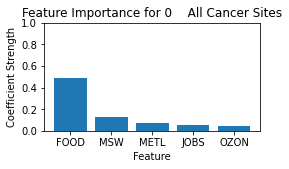

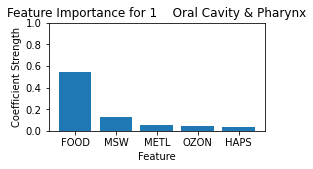

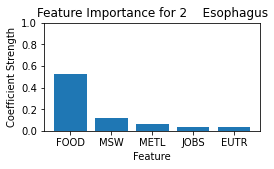

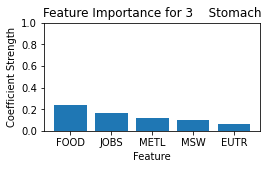

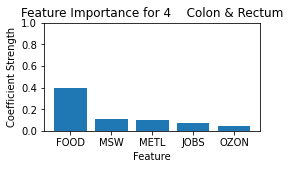

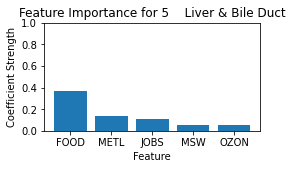

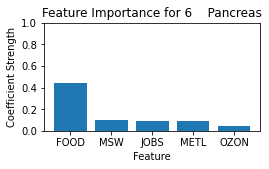

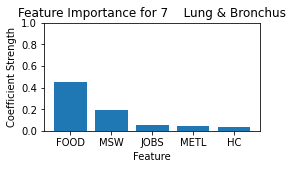

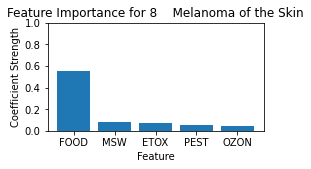

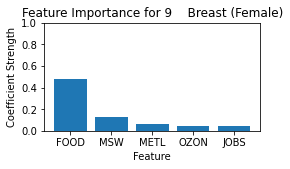

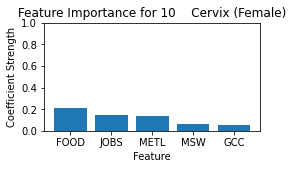

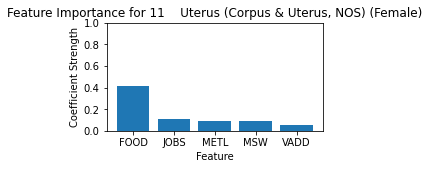

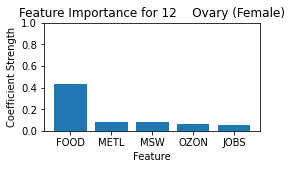

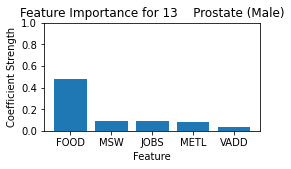

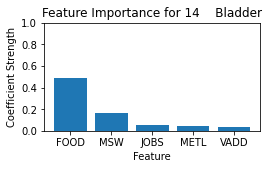

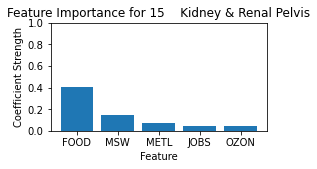

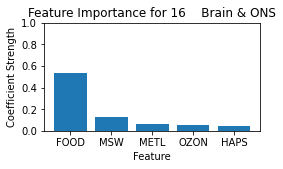

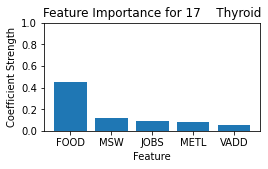

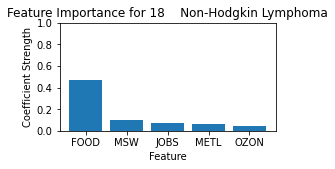

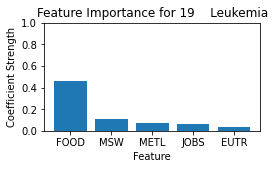

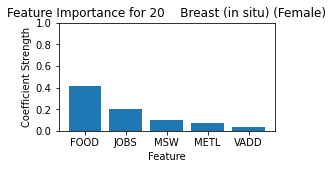

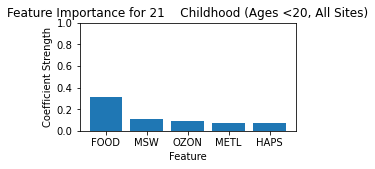

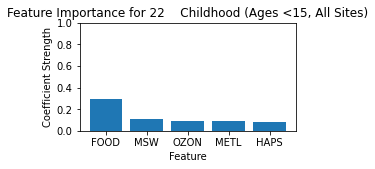

In [25]:
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating RandomForest Model
    print("Creating RandomForest Model and Fitting the Data")
    rf = RandomForestRegressor(n_estimators = 100,
                                      max_depth= 8, 
                                      random_state = RSEED)

    # Fit on training data
    rf.fit(X_train, y_train)
    
    #Evaluation
    r2_score=rf.score(X_test, y_test)
    print("score",r2_score)
    
    #Feature Importance
    print("Feature Importance")
    features=rf.feature_importances_
    #print(features)
    ind = np.argsort(features)[::-1]
    print("indecis:",ind)
    imp = features[ind]
    print("importances:",imp)
    cols =factors[ind]
    print("features:",cols)
    
    #plot the importance factors
    fig=plt.figure(figsize=(3,1.5))
    ax = fig.add_axes([0,0,1,1])
    ax.set_title('Feature Importance for {}'.format(discr))
    ax.bar( cols[:5].tolist(),imp[:5].tolist())
    ax.set_ylabel("Coefficient Strength")
    ax.set_xlabel("Feature")
    plt.ylim(0, 1)
    fig.show()
    print("\n")

# Logistic Regression

## Hypertuning

In [168]:
cancerData=data["cancer"]==1
newData=data[cancerData]    

#splitting to test and train
x1=newData.loc[:, 'ACID':'WATR']
y = newData['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)
scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)

XTrain (2193, 24)
XTest (940, 24)


In [194]:
# Create the model with 10 trees
#regressor = RandomForestRegressor(n_estimators = 100,
                                 # random_state = RSEED)

# Fit on training data
#regressor.fit(X_train, y_train)

parameters={'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'max_iter': [64,100,128,200,256,400,528,1000]}
lr = LogisticRegression(random_state = RSEED)
clf = GridSearchCV(lr, parameters)
clf.fit(X_train, y_train)

C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_

C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Owner\Miniconda3\lib\site-packa

C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=100, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': [64, 100, 128, 200, 256, 400, 528, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [195]:
print(clf.best_params_)

{'max_iter': 1000, 'solver': 'sag'}


## Logistic Regression Loop

In [198]:
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating Logistic Regression Model
    print("Creating Logistic Regression Model and Fitting the Data")
    lr = LogisticRegression(random_state=RSEED,solver='sag' ,max_iter=2000)

    # Fit on training data
    lr.fit(X_train, y_train)
    
    #Evaluation
    r2_score=lr.score(X_test, y_test)
    print("score",r2_score)
    print("\n")

cancer type: 1
0    All Cancer Sites
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.06170212765957447


cancer type: 3
1    Oral Cavity & Pharynx
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.3606382978723404


cancer type: 17
2    Esophagus
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.625531914893617


cancer type: 18
3    Stomach
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.5914893617021276


cancer type: 20
4    Colon & Rectum
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.1148936170212766


cancer type: 35
5    Liver & Bile Duct
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.5212765957446809


cancer type: 40
6    Pancreas
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.37127659574468086


cancer type: 47
7    Lung & Bronchus
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.08936170212765958


cancer type: 53
8    Melanoma of the Skin
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.2797872340425532


cancer type: 55
9    Breast (Female)
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.1


cancer type: 57
10    Cervix (Female)
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.7265957446808511


cancer type: 58
11    Uterus (Corpus & Uterus, NOS) (Female)
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.35638297872340424


cancer type: 61
12    Ovary (Female)
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.6265957446808511


cancer type: 66
13    Prostate (Male)
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.0925531914893617


cancer type: 71
14    Bladder
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.251063829787234


cancer type: 72
15    Kidney & Renal Pelvis
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.26276595744680853


cancer type: 76
16    Brain & ONS
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.5914893617021276


cancer type: 80
17    Thyroid
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.42872340425531913


cancer type: 86
18    Non-Hodgkin Lymphoma
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.28085106382978725


cancer type: 90
19    Leukemia
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.3468085106382979


cancer type: 400
20    Breast (in situ) (Female)
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.4074468085106383


cancer type: 515
21    Childhood (Ages <20, All Sites)
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.6957446808510638


cancer type: 516
22    Childhood (Ages <15, All Sites)
Creating Logistic Regression Model and Fitting the Data
score 0.7617021276595745




C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# SVR

## Hypertuning

In [207]:
cancerData=data["cancer"]==1
newData=data[cancerData]    

#splitting to test and train
x1=newData.loc[:, 'ACID':'WATR']
y = newData['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)
scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)

XTrain (2193, 24)
XTest (940, 24)


In [233]:
# Create the model with 10 trees
#regressor = RandomForestRegressor(n_estimators = 100,
                                 # random_state = RSEED)

# Fit on training data
#regressor.fit(X_train, y_train)


parameters={'C': [0.01,0.1,1],'epsilon':[0,0.001,0.01,0.1,1],'tol':[1e-5,1e-3,1e-1],'max_iter': [64,100,128,200,256,400,528,1000,2000]}
svr =LinearSVR(random_state = RSEED)
clf = GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=100, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1],
                         'epsilon': [0, 0.001, 0.01, 0.1, 1],
                         'max_iter': [64, 100, 128, 200, 256, 400, 528, 1000,
                                      2000],
                         'tol': [1e-05, 0.001, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [234]:
print(clf.best_params_)

{'C': 1, 'epsilon': 0, 'max_iter': 64, 'tol': 0.1}


## SVR Loop

In [238]:
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating SVR Model
    print("Creating SVR Model and Fitting the Data")
    svr = LinearSVR(random_state=0, C= 1, epsilon= 0, max_iter=64, tol= 0.1)

    # Fit on training data
    svr.fit(X_train, y_train)
    
    #Evaluation
    r2_score=svr.score(X_test, y_test)
    print("score",r2_score)


cancer type: 1
0    All Cancer Sites
Creating SVR Model and Fitting the Data
score 0.7184725059866879
cancer type: 3
1    Oral Cavity & Pharynx
Creating SVR Model and Fitting the Data
score 0.8975414971693537
cancer type: 17
2    Esophagus
Creating SVR Model and Fitting the Data
score 0.8862507159438485
cancer type: 18
3    Stomach
Creating SVR Model and Fitting the Data
score 0.8664749900261575
cancer type: 20
4    Colon & Rectum
Creating SVR Model and Fitting the Data
score 0.8826498922306962
cancer type: 35
5    Liver & Bile Duct
Creating SVR Model and Fitting the Data
score 0.8531337492527578
cancer type: 40
6    Pancreas
Creating SVR Model and Fitting the Data
score 0.902103399814497
cancer type: 47
7    Lung & Bronchus
Creating SVR Model and Fitting the Data
score 0.8250699098770378
cancer type: 53
8    Melanoma of the Skin
Creating SVR Model and Fitting the Data
score 0.7980331784515731
cancer type: 55
9    Breast (Female)
Creating SVR Model and Fitting the Data
score 0.90812129